In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set(style="whitegrid")

# Load pose_data.csv
data_df = pd.read_csv("pose_data.csv")

# pose_data.csv preview
print(data_df.head())

   frame  processing_time_ms  detected_keypoints  \
0      1          143.080950                  19   
1      2           97.080469                  17   
2      3          122.168303                  16   
3      4          113.056421                  17   
4      5          113.481283                  19   

                                   confidence_scores  
0  [0.6820955872535706, 0.6115659475326538, 0.353...  
1  [0.7799153923988342, 0.7210812568664551, 0.598...  
2  [0.7363194823265076, 0.707866370677948, 0.5391...  
3  [0.6772987842559814, 0.6417106986045837, 0.499...  
4  [0.7624384164810181, 0.6886500716209412, 0.682...  


In [11]:
# Load video_pose_data.csv
video_data_df = pd.read_csv("video_pose_data.csv")

# Preview the video data
print(video_data_df.head())

   frame  processing_time_ms  detected_keypoints  \
0      1           94.518185                   9   
1      2           89.537382                   9   
2      3           84.521770                  11   
3      4           81.521749                  12   
4      5           75.005293                  10   

                                   confidence_scores  
0  [0.7201645970344543, 0.5812837481498718, 0.560...  
1  [0.6867642402648926, 0.5639125108718872, 0.542...  
2  [0.7345669865608215, 0.5763475894927979, 0.562...  
3  [0.7837709784507751, 0.5969558358192444, 0.575...  
4  [0.7949299812316895, 0.6130103468894958, 0.609...  


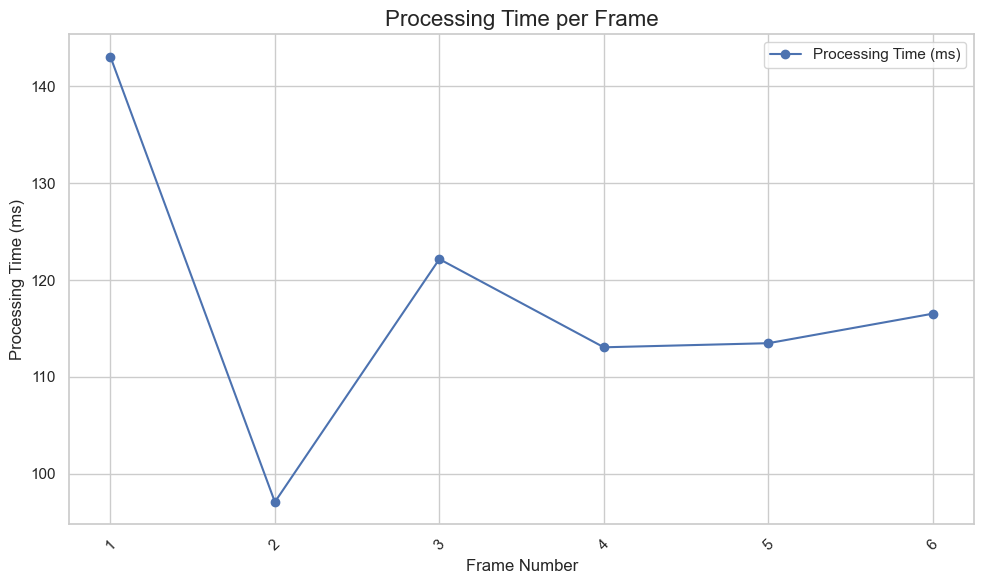

In [6]:
# Plotting the processing time per frame (ms)
plt.figure(figsize=(10, 6))
plt.plot(data_df['frame'], data_df['processing_time_ms'], marker='o', linestyle='-', color='b', label='Processing Time (ms)')
plt.title("Processing Time per Frame", fontsize=16)
plt.xlabel("Frame Number", fontsize=12)
plt.ylabel("Processing Time (ms)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

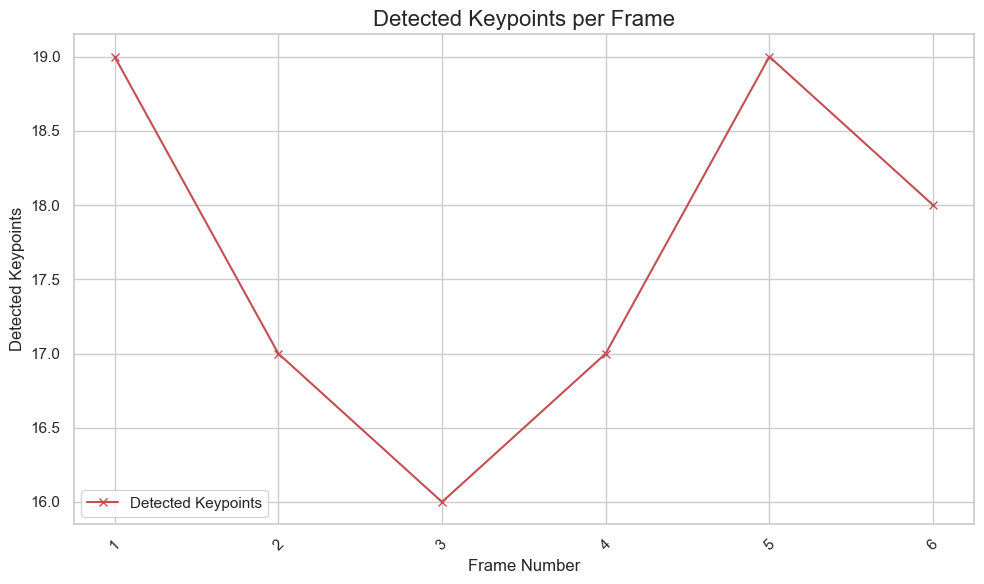

In [7]:
# Plotting the number of detected keypoints per frame
plt.figure(figsize=(10, 6))
plt.plot(data_df['frame'], data_df['detected_keypoints'], marker='x', linestyle='-', color='r', label='Detected Keypoints')
plt.title("Detected Keypoints per Frame", fontsize=16)
plt.xlabel("Frame Number", fontsize=12)
plt.ylabel("Detected Keypoints", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [8]:
# Plotting confidence scores for each frame (multiple series in a stacked bar chart)
# Convert confidence scores to numeric and normalize by the number of keypoints
data_df['confidence_scores_count'] = data_df['confidence_scores'].apply(lambda x: len(ast.literal_eval(x)) if pd.notnull(x) else 0)
confidence_data = data_df['confidence_scores'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
all_confidences = [item for sublist in confidence_data for item in sublist]

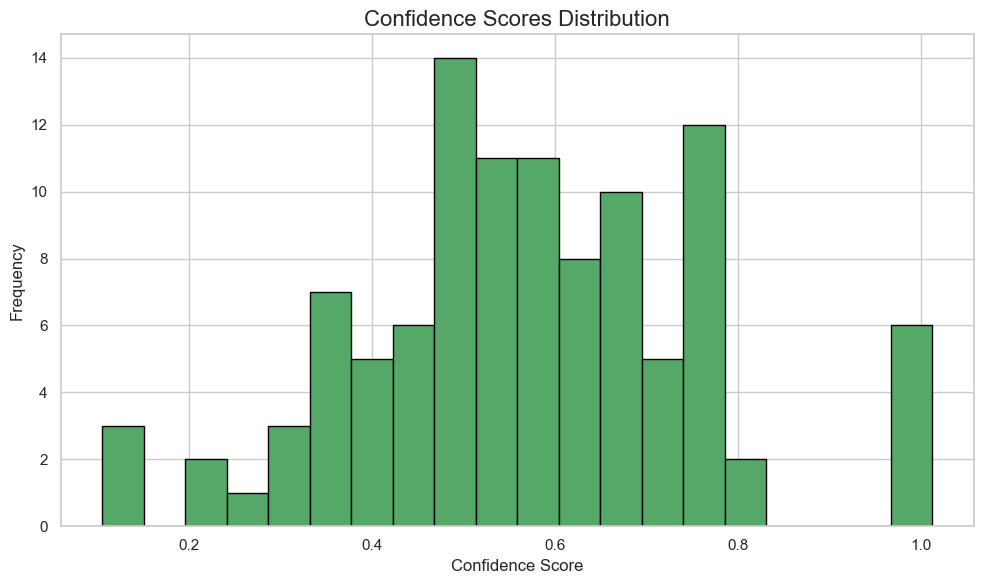

In [9]:
# Create a histogram for confidence scores distribution across all frames
plt.figure(figsize=(10, 6))
plt.hist(all_confidences, bins=20, color='g', edgecolor='black')
plt.title("Confidence Scores Distribution", fontsize=16)
plt.xlabel("Confidence Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

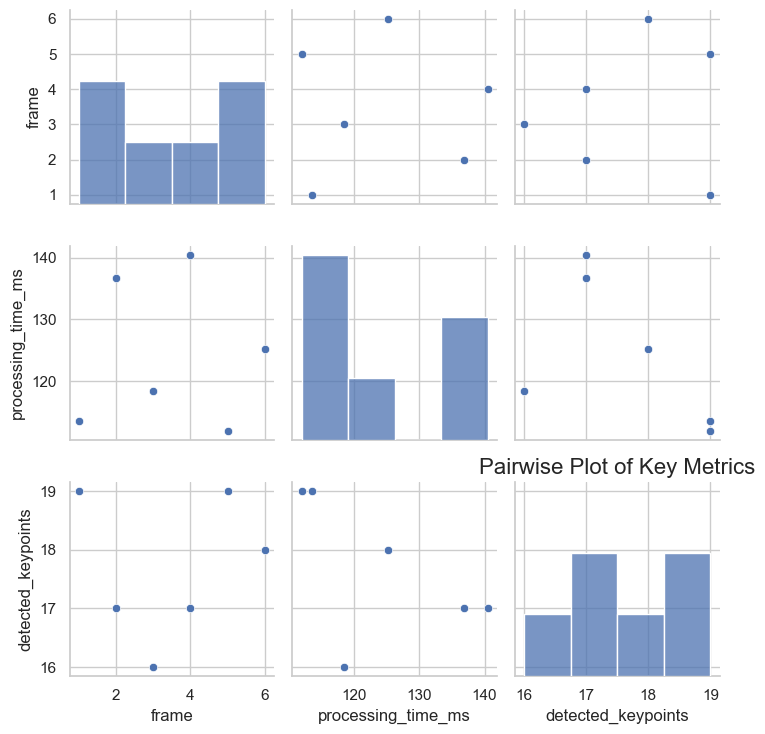

In [11]:
sns.pairplot(data_df[['frame', 'processing_time_ms', 'detected_keypoints']])
plt.title("Pairwise Plot of Key Metrics", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
#plots for video model

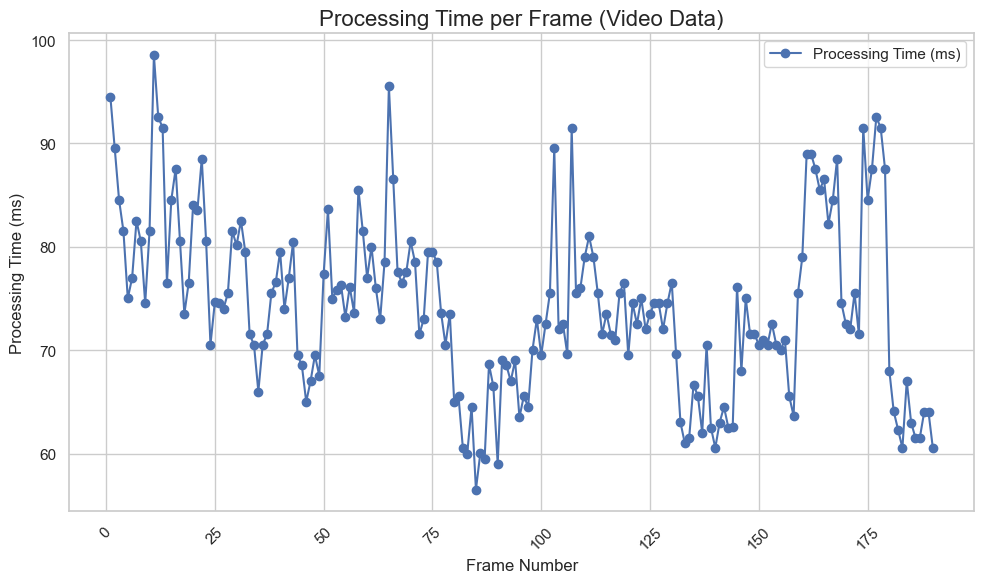

In [12]:
# Plotting the processing time per frame (ms) for video
plt.figure(figsize=(10, 6))
plt.plot(video_data_df['frame'], video_data_df['processing_time_ms'], marker='o', linestyle='-', color='b', label='Processing Time (ms)')
plt.title("Processing Time per Frame (Video Data)", fontsize=16)
plt.xlabel("Frame Number", fontsize=12)
plt.ylabel("Processing Time (ms)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


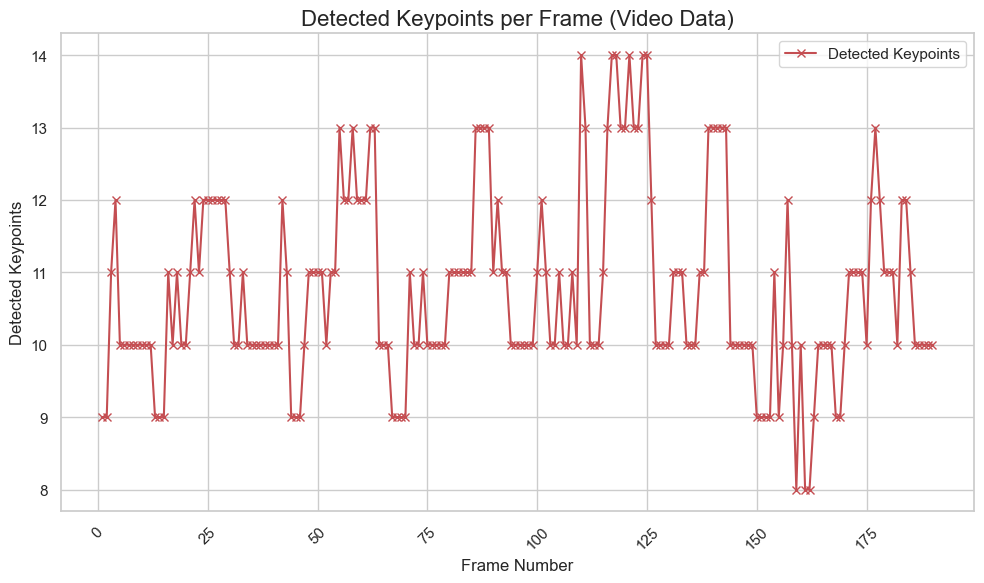

In [13]:
# Plotting the number of detected keypoints per frame for video
plt.figure(figsize=(10, 6))
plt.plot(video_data_df['frame'], video_data_df['detected_keypoints'], marker='x', linestyle='-', color='r', label='Detected Keypoints')
plt.title("Detected Keypoints per Frame (Video Data)", fontsize=16)
plt.xlabel("Frame Number", fontsize=12)
plt.ylabel("Detected Keypoints", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


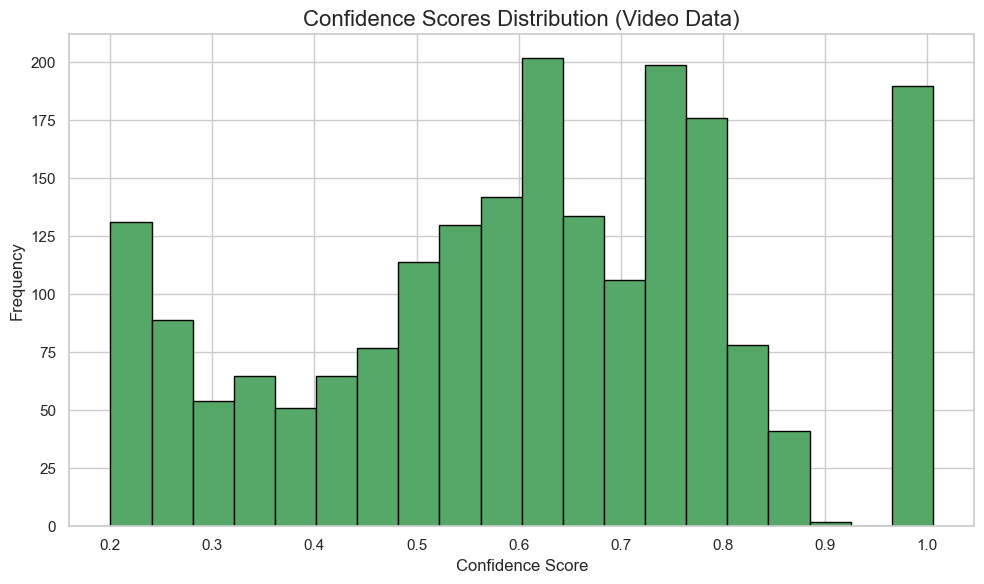

In [14]:
# Extract confidence scores from video data
video_data_df['confidence_scores_count'] = video_data_df['confidence_scores'].apply(lambda x: len(ast.literal_eval(x)) if pd.notnull(x) else 0)
video_confidence_data = video_data_df['confidence_scores'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
video_all_confidences = [item for sublist in video_confidence_data for item in sublist]

# Create a histogram for confidence scores distribution in video
plt.figure(figsize=(10, 6))
plt.hist(video_all_confidences, bins=20, color='g', edgecolor='black')
plt.title("Confidence Scores Distribution (Video Data)", fontsize=16)
plt.xlabel("Confidence Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()


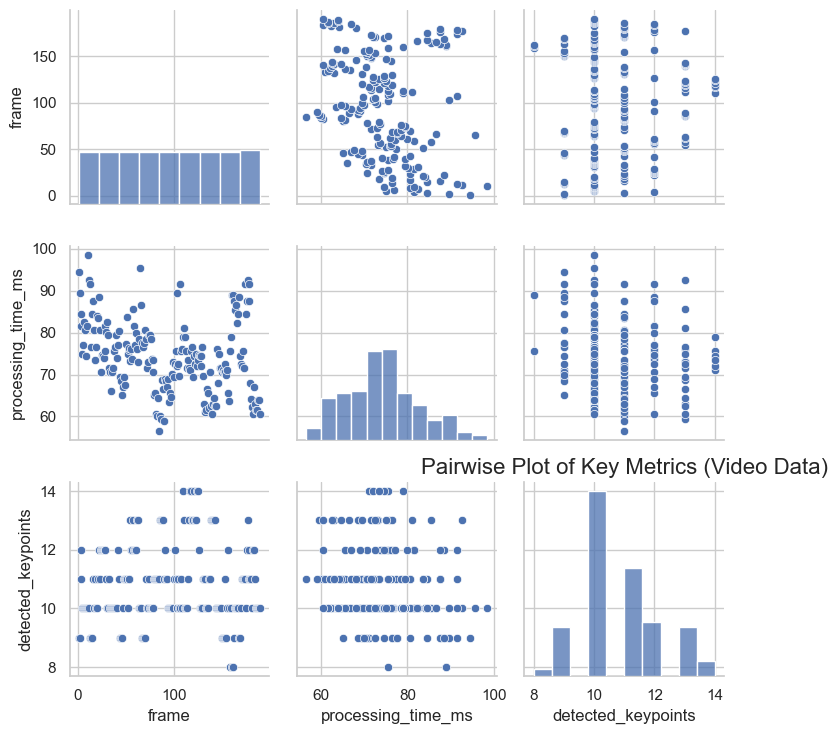

In [15]:
# Plot pairwise relationships between metrics in video data
sns.pairplot(video_data_df[['frame', 'processing_time_ms', 'detected_keypoints']])
plt.title("Pairwise Plot of Key Metrics (Video Data)", fontsize=16)
plt.tight_layout()
plt.show()
